# Measuring Variability  

This csv file below contains rough estimates of the baseline values for these metrics (again, these numbers have been changed from Udacity's true numbers).  

For each of the metrics the standard deviation is calculated for **a sample size of 5000 unique cookies** visiting the course overview page.

## baseline values

In [241]:
#import packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

#import csv file
baseline = pd.read_csv('data/Final Project Baseline Values.csv', header=None)
baseline

,0,1
0,Unique cookies to view course overview page pe...,40000.000000
1,"Unique cookies to click ""Start free trial"" per...",3200.000000
2,Enrollments per day:,660.000000
3,"Click-through-probability on ""Start free trial"":",0.080000
4,"Probability of enrolling, given click:",0.206250
5,"Probability of payment, given enroll:",0.530000
6,"Probability of payment, given click",0.109313


In [23]:
# adjust the dataset 
baseline.columns = ['Metrics','Estimator']
baseline['Metrics'] = ['cookies', 'cliks', 'user-id','click-through-probability','gross conversion','retention','net conversion']
baseline['dmin'] = [3000, 240, -50, 0.01, -0.01, 0.01, 0.0075]
baseline

,Metrics,Estimator,dmin
0,cookies,40000.000000,3000.0000
1,cliks,3200.000000,240.0000
2,user-id,660.000000,-50.0000
3,click-through-probability,0.080000,0.0100
4,gross conversion,0.206250,-0.0100
5,retention,0.530000,0.0100
6,net conversion,0.109313,0.0075


## scaled estimator

Since we have already set the sample size of 5000 unique cookies, we should calculate the estimated data for clicks, user-id, which are necessary for us to get the standard deviation in the certain sample size.

In [49]:
# insert column
baseline['Scaled Estimator'] = np.nan

# scaled fraction 
fraction = 5000/40000

for i in range(3):
    baseline.loc[i,'Scaled Estimator'] = baseline['Estimator'][i]*fraction
    
baseline

,Metrics,Estimator,Scaled Estimator,dmin
0,cookies,40000.000000,5000.0,3000.0000
1,cliks,3200.000000,400.0,240.0000
2,user-id,660.000000,82.5,-50.0000
3,click-through-probability,0.080000,NaN,0.0100
4,gross conversion,0.206250,NaN,-0.0100
5,retention,0.530000,NaN,0.0100
6,net conversion,0.109313,NaN,0.0075


## Assumption  

Now, we can calculate the standard deviation of gross conversion, retention, and net conversion. And there is an assumption that we should make. For those three propability metrics, we assume their distributions are approximately normal (binomial distribution) because the scaled estimators are large (Central Limit Theorem). 

However, if we are not sure. We can also test it using the normal approximation, i.e np>10 and np(1-p)>10

In [52]:
# the normal approximation function
def normal_A(n,p,metric):
    if 10 < n*p and 10 < n*(1-p):
        print(metric,":  n =", n, "is valid")
    else:
        print(metric,":  n =", n, "is not valid")

# check 
# remember the sample size for different metrics are different
for i,j in zip([1,2,1],[4,5,6]):
    normal_A (baseline.loc[i, "Scaled Estimator"], baseline.loc[j,"Estimator"], baseline.loc[j,"Metrics"])

gross conversion :  n = 400.0 is valid
retention :  n = 82.5 is valid
net conversion :  n = 400.0 is valid


## standard deviation

Now we can set the assumption that these three metrics are approximately binomial distribution.   
In binomial distribution, **the standard deviation = sqrt(p(1-p)/n)**

In [57]:
# inset column
baseline.insert(3, 'Standard Deviation', np.nan)

# the std function
import math
def b_std(n,p):
    return math.sqrt(p*(1-p)/n)

# calculation
for i,j in zip([1,2,1],[4,5,6]):
    baseline.loc[j,'Standard Deviation'] = b_std(baseline.loc[i, "Scaled Estimator"], baseline.loc[j,"Estimator"])

baseline

,Metrics,Estimator,Scaled Estimator,Standard Deviation,dmin
0,cookies,40000.000000,5000.0,NaN,3000.0000
1,cliks,3200.000000,400.0,NaN,240.0000
2,user-id,660.000000,82.5,NaN,-50.0000
3,click-through-probability,0.080000,NaN,NaN,0.0100
4,gross conversion,0.206250,NaN,0.020231,-0.0100
5,retention,0.530000,NaN,0.054949,0.0100
6,net conversion,0.109313,NaN,0.015602,0.0075


**Notice:** Since the denominator for gross conversion and net conversion is the number of clicks, which is also the unit of diversion, we can expect their analytical variance is close to the empirical variance. However, for the rentention, we recommend to collect an empirical variance. Based on the difference between the denominator and the unit of diversion, we could expect the empirical variance of the retention would be higher than the analyticaal variance.

# Sizing

## Choosing Number of Samples given Power

### calculation

We set the alpha to be 0.05 and the statistical power to be 0.80 (i.e. beta is 0.20).  
And we applied an online caculator:

gross conversion:
<img src="figure/gross_conversion.png">

retention:
<img src="figure/retention.png">

net conversion:
<img src="figure/net_conversion.png">

Therefore, we can calculate how many pageviews we need for each metric:

1. Gross Conversion 
  - Baseline Conversion: 20.625%
  - Minimum Detectable Effect: 1%
  - Alpha: 5%
  - Beta: 20% 
  - Sample Size = 25,835 enrollments/group
  - Number of groups = 2 (experiment & control)
  - Total sample size = 2*25,835 = 51,670 clicks
  - Clicks/Pageview: 3200/40000 = 0.08 clicks/pageview
  - Pageviews Required = 51,670/0.08 = 645,875  
  
  
2. Retention 
  - Baseline Conversion: 53.000%
  - Minimum Detectable Effect: 1%
  - Alpha: 5%
  - Beta: 20% 
  - Sample Size = 39,115 enrollments/group
  - Number of groups = 2 (experiment & control)
  - Total sample size = 2*39,115 = 78,230 enrollments
  - user-id(enrollments)/Pageview: 660/40000 = 0.0165 enrollments/pageview
  - Pageviews Required = 78,230/0.0165 = 4,741,212  
  
  
3. Net Conversion
  - Baseline Conversion: 10.931%
  - Minimum Detectable Effect: 0.75%
  - Alpha: 5%
  - Beta: 20% 
  - Sample Size = 27,413 enrollments/group
  - Number of groups = 2 (experiment & control)
  - Total sample size = 2*27,413 = 54,826 clicks
  - Clicks/Pageview: 3200/40000 = 0.08 clicks/pageview
  - Pageviews Required = 54,826/0.08 = 685,325

In [60]:
# inset column
baseline['samplesize'] = [np.nan,np.nan,np.nan,np.nan,645875,4741212,685325]

baseline

,Metrics,Estimator,Scaled Estimator,Standard Deviation,dmin,samplesize
0,cookies,40000.000000,5000.0,NaN,3000.0000,NaN
1,cliks,3200.000000,400.0,NaN,240.0000,NaN
2,user-id,660.000000,82.5,NaN,-50.0000,NaN
3,click-through-probability,0.080000,NaN,NaN,0.0100,NaN
4,gross conversion,0.206250,NaN,0.020231,-0.0100,645875.0
5,retention,0.530000,NaN,0.054949,0.0100,4741212.0
6,net conversion,0.109313,NaN,0.015602,0.0075,685325.0


Given the calculation above, to test these three hypothesis, we need 4,741,212 pageviews.

### multiple hypothesis?

As we now have three hypothesis, and these three hypothesis are not fully independent. So the false positive rate is likely to be increased. We can solve the multiple hypothesis problem by Bonferroni Correction method, but it still has backward that it will increase the fale negatives. Therefore, we prefer not to solving this problem.

## Choosing Duration vs. Exposure

From the Udacity, given there are 40k pageviews per day, we can first assume we can use 100% of users for this experiment.

In [61]:
# gross conversion, retention and net conversion
print('for the experiment with gross conversion, retention and net conversion, we need: ', 
      round(4741212/40000),' days')

# gross conversion and net conversion
print('for the experiment with gross conversion and net conversion, we need: ', 
      round(685325/40000),' days')

for the experiment with gross conversion, retention and net conversion, we need:  119  days
for the experiment with gross conversion and net conversion, we need:  17  days


**Notice:** We can see there is a huge difference in experiment duration between using and discarding retention. Therefore, we decide to remove the retention metric for this experiment. Because firstly, using the retention metric will take a long time to conduct this experiment, which will cause opportunity costs(eg. launch more different experiments, spend more time on other feature improvements). Moreover, there will be some business risks that exist if we use the retention metric. For instance, this change will give a worse user experiment decreasing the conversion rate.

Also, for the experiment with gross conversion and net conversion, we should reconsider the fraction of Udacity's traffic to be diverted. Considering there might be some seasonal effect for this experiment, 17 days seems not enough for us to certain. Secondly, using full traffic is very costly and risky (opportunity cost & business risk we mentioned above). Diverting a half or lower of traffic will be much safer.

In [63]:
# gross conversion and net conversion
# 50% traffic
print('for the experiment using 50% traffic with gross conversion and net conversion, we need: ', 
      round(685325/(40000*0.5)),' days')

# gross conversion and net conversion
# 45% traffic
print('for the experiment using 45% traffic with gross conversion and net conversion, we need: ', 
      round(685325/(40000*0.45)),' days')

for the experiment using 50% traffic with gross conversion and net conversion, we need:  34  days
for the experiment using 45% traffic with gross conversion and net conversion, we need:  38  days


It seems that 38 days are little bit longer, so we will divert 50% traffic for the experiment with gross conversion and net conversion.

# Analysis

Now, we have two datasets from Udacity, one for control group and one for experiment group.

The meaning of each column is:

- Pageviews: Number of unique cookies to view the course overview page that day.
- Clicks: Number of unique cookies to click the course overview page that day.
- Enrollments: Number of user-ids to enroll in the free trial that day.
- Payments: Number of user-ids who who enrolled on that day to remain enrolled for 14 days and thus make a payment. (Note that the date for this column is the start date, that is, the date of enrollment, rather than the date of the payment. The payment happened 14 days later. Because of this, the enrollments and payments are tracked for 14 fewer days than the other columns.)

In [149]:
# import dataset
control = pd.read_csv('data/Final Project Results - Control.csv')
experiment = pd.read_csv('data/Final Project Results - Experiment.csv')
control.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7723,687,134.0,70.0
1,"Sun, Oct 12",9102,779,147.0,70.0
2,"Mon, Oct 13",10511,909,167.0,95.0
3,"Tue, Oct 14",9871,836,156.0,105.0
4,"Wed, Oct 15",10014,837,163.0,64.0


In [150]:
experiment.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7716,686,105.0,34.0
1,"Sun, Oct 12",9288,785,116.0,91.0
2,"Mon, Oct 13",10480,884,145.0,79.0
3,"Tue, Oct 14",9867,827,138.0,92.0
4,"Wed, Oct 15",9793,832,140.0,94.0


In [151]:
# the duration for this experiment 
print('control group duration:\n', control.count())
print('experiment group duration:\n', experiment.count())

control group duration:
 Date           37
Pageviews      37
Clicks         37
Enrollments    23
Payments       23
dtype: int64
experiment group duration:
 Date           37
Pageviews      37
Clicks         37
Enrollments    23
Payments       23
dtype: int64


In [152]:
# calculate the sample size for this dataset that Udacity provide us
print('control size: ' , control['Pageviews'].sum())
print('experiment size: ' , experiment['Pageviews'].sum())
print('sample size: ' , control['Pageviews'].sum()+experiment['Pageviews'].sum())

control size:  345543
experiment size:  344660
sample size:  690203


Seems the control group size are larger than the experiment group size, we will figure out whether this difference within our expectations in future.  
Now, we can make some visualizations to make a clear comparison between control and experiment groups.

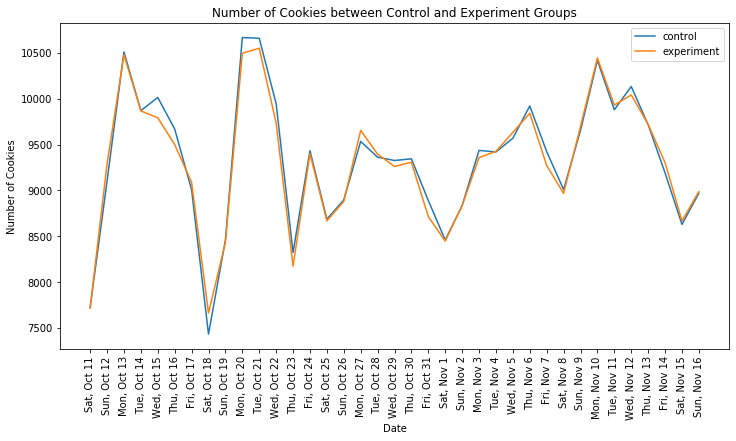

In [153]:
# invariant: Number of cookies
plt.figure(figsize=(12,6))
x = control['Date']
line1 = plt.plot(x ,control['Pageviews'],label = 'control')
line2 = plt.plot(x ,experiment['Pageviews'], label = 'experiment')
plt.xticks(rotation = 90)
plt.xlabel('Date')
plt.ylabel('Number of Cookies')
plt.title('Number of Cookies between Control and Experiment Groups')
plt.legend()

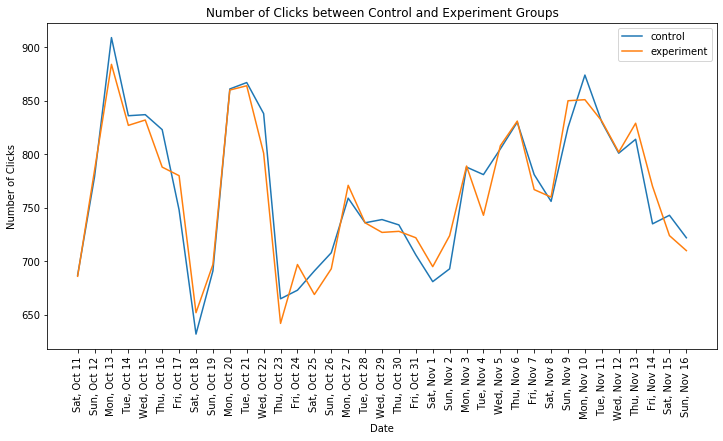

In [154]:
# invariant: Number of clicks
plt.figure(figsize=(12,6))
x = control['Date']
line1 = plt.plot(x ,control['Clicks'],label = 'control')
line2 = plt.plot(x ,experiment['Clicks'], label = 'experiment')
plt.xticks(rotation = 90)
plt.xlabel('Date')
plt.ylabel('Number of Clicks')
plt.title('Number of Clicks between Control and Experiment Groups')
plt.legend()

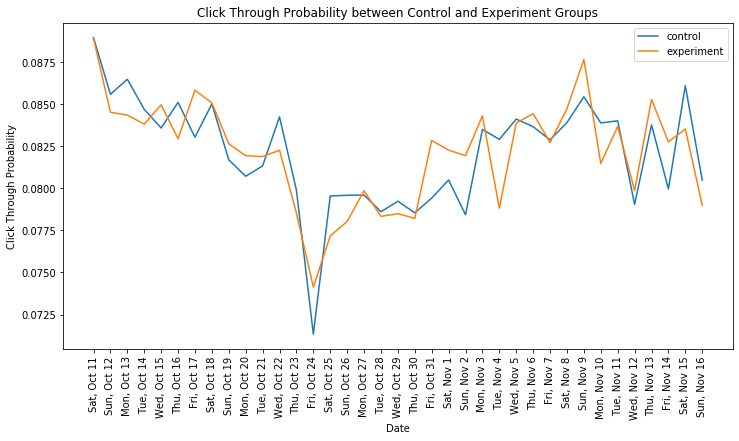

In [155]:
# invariant: click through probability (Number of clicks / Number of cookies)
plt.figure(figsize=(12,6))
x = control['Date']
line1 = plt.plot(x ,control['Clicks']/control['Pageviews'],label = 'control')
line2 = plt.plot(x ,experiment['Clicks']/experiment['Pageviews'], label = 'experiment') 
plt.xticks(rotation = 90)
plt.xlabel('Date')
plt.ylabel('Click Through Probability')
plt.title('Click Through Probability between Control and Experiment Groups')
plt.legend()

Here we also found there is a dramatically drop on click through rate on Oct. 24th. It's worthwhile to find the potential reason and effects.

## Sanity Checks

### Cookies

First, we've already calculated the size of control group and experiment group:   
- control group size:  345543  
- experiment size:  344660  
- sample size:  690203    

Is the difference between the size of control group and experiment group within our expectations?  

Given each cookie is randomly assgined to the control or experiment group with probability 0.5. If we now regard being assigned to the control group as a success, we can use the binominal distribution to model the number of successes in the given whole sample (control+experiment) and perform a binomial test as sanity check.
(We further assume the whole sample size are large enough to approach the normal distribution (Central Limit Theorem)).

In [156]:
# create a new dataframe
Sanity_Check = pd.DataFrame(index = ['Cookies','Clicks','CTP'], 
                            columns=['CI_lower','CI_upper','obs','passes or not',])
Sanity_Check.obs = [control['Pageviews'].sum()/(control['Pageviews'].sum()+experiment['Pageviews'].sum()),
      control['Clicks'].sum()/(control['Clicks'].sum()+experiment['Clicks'].sum()),np.nan]
Sanity_Check

,CI_lower,CI_upper,obs,passes or not
Cookies,NaN,NaN,0.500640,NaN
Clicks,NaN,NaN,0.500467,NaN
CTP,NaN,NaN,NaN,NaN


In [157]:
# binomial test function
prob = 0.5
alpha = 0.05

def binomial_test(A,B):
    std = math.sqrt(0.5*0.5/(control[A].sum()+experiment[A].sum()))
    ME = std*1.96
    Sanity_Check.loc[B,'CI_lower'], Sanity_Check.loc[B,'CI_upper'] = 0.5-ME, 0.5+ME
    if Sanity_Check.loc[B,'CI_lower'] <= Sanity_Check.loc[B,'obs'] <= Sanity_Check.loc[B,'CI_upper']:
        Sanity_Check.loc[B,'passes or not'] = 1
    else:
        Sanity_Check.loc[B,'passes or not'] = 0 

binomial_test('Pageviews','Cookies')    
    
Sanity_Check

,CI_lower,CI_upper,obs,passes or not
Cookies,0.49882,0.50118,0.500640,1
Clicks,NaN,NaN,0.500467,NaN
CTP,NaN,NaN,NaN,NaN


### Clicks

In [158]:
# For the Clicks metric, we can also use the binomial test.

binomial_test('Clicks','Clicks')    
    
Sanity_Check

,CI_lower,CI_upper,obs,passes or not
Cookies,0.49882,0.50118,0.500640,1
Clicks,0.495884,0.504116,0.500467,1
CTP,NaN,NaN,NaN,NaN


If you want to save time, an exact binomial test is highly recommended

### Click Through Probability

For the click through probability, we've already assumed the sample performs the normal distribution. Therefore, we can further assume that the click through probability in both control and experiment groups perform the binomial distribution. So we can lauch a Z-test to check the click through probability. (pooled p)

In [160]:
# CTP for both groups
CTP_control = control['Clicks'].sum() / control['Pageviews'].sum()
CTP_experiment = experiment['Clicks'].sum() / experiment['Pageviews'].sum()

# sample standard deviations for both groups (distribution)
std_control = math.sqrt(CTP_control*(1-CTP_control))
std_experiment = math.sqrt(CTP_experiment*(1-CTP_experiment))

# SE pooled
SE_pooled = math.sqrt(std_control**2/control["Pageviews"].sum()+std_experiment**2/experiment["Pageviews"].sum())

# ME
ME_pooled = SE_pooled*1.96

# CI_lower, CI_upper
Sanity_Check.loc['CTP','CI_lower'],Sanity_Check.loc['CTP','CI_upper'] = 0-ME_pooled,0+ME_pooled

# obs
obs = CTP_control - CTP_experiment 
Sanity_Check.loc['CTP','obs'] = obs

# conclusion
if Sanity_Check.loc['CTP','CI_lower'] <= obs <= Sanity_Check.loc['CTP','CI_upper']:
    Sanity_Check.loc['CTP','passes or not'] = 1 
else:
    Sanity_Check.loc['CTP','passes or not'] = 0
    
Sanity_Check

,CI_lower,CI_upper,obs,passes or not
Cookies,0.49882,0.50118,0.500640,1
Clicks,0.495884,0.504116,0.500467,1
CTP,-0.00129568,0.00129568,-0.000057,1


Based on the Sanity_Check chart, we can conclude that all invariant metrics have stood the test successfully.

## Result Analysis

First, we can also visulize the evaluation metrics.

In [165]:
# slice the control dataset
control_sliced = control[:23]
control_sliced.tail()

# slice the experiment dataset
experiment_sliced = experiment[:23]
experiment_sliced.tail()

,Date,Pageviews,Clicks,Enrollments,Payments
18,"Wed, Oct 29",9262,727,201.0,96.0
19,"Thu, Oct 30",9308,728,207.0,67.0
20,"Fri, Oct 31",8715,722,182.0,123.0
21,"Sat, Nov 1",8448,695,142.0,100.0
22,"Sun, Nov 2",8836,724,182.0,103.0


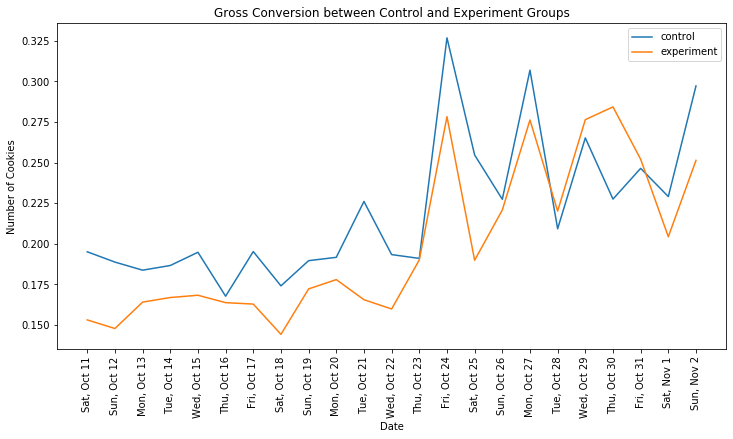

In [169]:
# evaluation metric: Gross Conversion
plt.figure(figsize=(12,6))
x = control_sliced['Date']
line1 = plt.plot(x ,control_sliced['Enrollments']/control_sliced['Clicks'],label = 'control')
line2 = plt.plot(x ,experiment_sliced['Enrollments']/experiment_sliced['Clicks'], label = 'experiment')
plt.xticks(rotation = 90)
plt.xlabel('Date')
plt.ylabel('Number of Cookies')
plt.title('Gross Conversion between Control and Experiment Groups')
plt.legend()

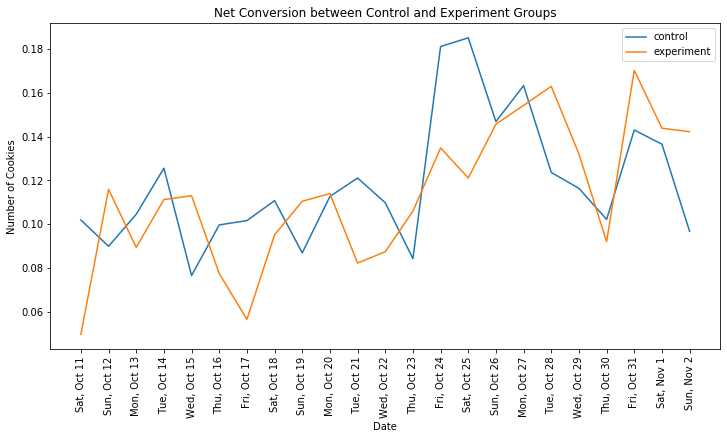

In [170]:
# evaluation metric: Net Conversion
plt.figure(figsize=(12,6))
x = control_sliced['Date']
line1 = plt.plot(x ,control_sliced['Payments']/control_sliced['Clicks'],label = 'control')
line2 = plt.plot(x ,experiment_sliced['Payments']/experiment_sliced['Clicks'], label = 'experiment')
plt.xticks(rotation = 90)
plt.xlabel('Date')
plt.ylabel('Number of Cookies')
plt.title('Net Conversion between Control and Experiment Groups')
plt.legend()

We can also see there is a huge peak on Oct.24th. According to we've mentioned a drop of click through probability on Oct.24th, we can infer that there is a larger number of pageviews. We recommend Udacity teams to do some further analysis on the whole traffic instead of this sample size.

### Check for Practical and Statistical Significance  
Now, both gross conversion and net conversion are probabilities, similar to click-through probability. Therefore, we can check them as we checked the click-through rate above. However, this time we will check for both practical(dmin) and statistical significance. 

In [176]:
# create a new dataframe
results = pd.DataFrame(index = ['Gross_Conversion','Net_Conversion'], 
                            columns=['CI_lower','CI_upper','obs','stats_sig?','dmin','prac_sig?'])

# dmin
results.dmin = [baseline.loc[4,'dmin'],baseline.loc[6,'dmin']]

results

,CI_lower,CI_upper,obs,stats_sig?,dmin,prac_sig?
Gross_Conversion,NaN,NaN,NaN,NaN,-0.0100,NaN
Net_Conversion,NaN,NaN,NaN,NaN,0.0075,NaN


**Notice:** Because the payments and enrollments are None in the last 14 days, we should recalculate the real sample size for checking the evaluation metrics.

In [180]:
# recalculate the sample size
real_size = control_sliced['Pageviews'].sum() + experiment_sliced['Pageviews'].sum()
real_size

423525

In [190]:
# Gross Conversion
control_GC = control_sliced['Enrollments'].sum()/control_sliced['Clicks'].sum()
experiment_GC = experiment_sliced['Enrollments'].sum()/experiment_sliced['Clicks'].sum()
# Net Conversion
control_NC = control_sliced['Payments'].sum()/control_sliced['Clicks'].sum()
experiment_NC = experiment_sliced['Payments'].sum()/experiment_sliced['Clicks'].sum()
                                                     
# obs
results.obs = [experiment_GC - control_GC, experiment_NC - control_NC]

# alpha = 0.05

# std
    #GC
std_control_GC = math.sqrt(control_GC*(1-control_GC))
std_experiment_GC = math.sqrt(experiment_GC*(1-experiment_GC)) 
pooled_GC = math.sqrt(std_control_GC**2/control_sliced['Clicks'].sum() + 
                   std_experiment_GC**2 /experiment_sliced['Clicks'].sum())
    #NC
std_control_NC = math.sqrt(control_NC*(1-control_NC))
std_experiment_NC = math.sqrt(experiment_NC*(1-experiment_NC)) 
pooled_NC = math.sqrt(std_control_NC**2/control_sliced['Clicks'].sum() +
                   std_experiment_NC**2 /experiment_sliced['Clicks'].sum())
    
# CI
results.loc['Gross_Conversion','CI_lower'], results.loc['Gross_Conversion','CI_upper'] = results.loc['Gross_Conversion','obs']-pooled_GC*1.96, results.loc['Gross_Conversion','obs']+pooled_GC*1.96
results.loc['Net_Conversion','CI_lower'], results.loc['Net_Conversion','CI_upper'] = results.loc['Net_Conversion','obs']-pooled_NC*1.96, results.loc['Net_Conversion','obs']+pooled_NC*1.96 

# stats check
if results.loc['Gross_Conversion','CI_lower'] <= 0 <= results.loc['Gross_Conversion','CI_upper']:
    results.loc['Gross_Conversion','stats_sig?'] = 0
else: 
    results.loc['Gross_Conversion','stats_sig?'] = 1
    
if results.loc['Net_Conversion','CI_lower'] <= 0 <= results.loc['Net_Conversion','CI_upper']:
    results.loc['Net_Conversion','stats_sig?'] = 0
else: 
    results.loc['Net_Conversion','stats_sig?'] = 1

# practical check
if results.loc['Gross_Conversion','dmin'] < 0:
    if results.loc['Gross_Conversion','obs'] <= results.loc['Gross_Conversion','dmin']:
        results.loc['Gross_Conversion','prac_sig?'] = 1 
    else: 
        results.loc['Gross_Conversion','prac_sig?'] = 0

if results.loc['Gross_Conversion','dmin'] > 0:
    if results.loc['Gross_Conversion','obs'] >= results.loc['Gross_Conversion','dmin']:
        results.loc['Gross_Conversion','prac_sig?'] = 1 
    else: 
        results.loc['Gross_Conversion','prac_sig?'] = 0
    
    
if results.loc['Net_Conversion','dmin'] < 0:
    if results.loc['Net_Conversion','obs'] <= results.loc['Net_Conversion','dmin']:
        results.loc['Net_Conversion','prac_sig?'] = 1 
    else: 
        results.loc['Net_Conversion','prac_sig?'] = 0

if results.loc['Net_Conversion','dmin'] > 0:
    if results.loc['Net_Conversion','obs'] >= results.loc['Net_Conversion','dmin']:
        results.loc['Net_Conversion','prac_sig?'] = 1 
    else: 
        results.loc['Net_Conversion','prac_sig?'] = 0   
    
    
results

,CI_lower,CI_upper,obs,stats_sig?,dmin,prac_sig?
Gross_Conversion,-0.0291203,-0.0119894,-0.020555,1,-0.0100,1
Net_Conversion,-0.0116043,0.00185686,-0.004874,0,0.0075,0


Now we can see the gross conversion decreased 2% in this A/B test, which was statiscally and practically significant while the net conversion was not.

### Week Analysis

At last, we were asked to finish the sign test for this A/B test. However, the prior assumption for sigh test that the two dependent samples should be paired or matched viloates our A/B test assumption. So we will forgo this additional test, instead, we can make an analysis about the seasonality.


In [202]:
df_temp = pd.merge(control_sliced, experiment_sliced, on="Date", how="left")
df_temp['Day'] = df_temp['Date'].apply(lambda x:x[:3]).tolist()
df_temp = df_temp.drop(['Date', 'Pageviews_x','Pageviews_y'],axis=1)
df_temp.head()

,Clicks_x,Enrollments_x,Payments_x,Clicks_y,Enrollments_y,Payments_y,Day
0,687,134.0,70.0,686,105.0,34.0,Sat
1,779,147.0,70.0,785,116.0,91.0,Sun
2,909,167.0,95.0,884,145.0,79.0,Mon
3,836,156.0,105.0,827,138.0,92.0,Tue
4,837,163.0,64.0,832,140.0,94.0,Wed


In [219]:
temp = df_temp.groupby(by='Day', axis=0).sum()
temp = temp.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
temp

,Clicks_x,Enrollments_x,Payments_x,Clicks_y,Enrollments_y,Payments_y
Day,,,,,,
Mon,2529,565.0,316.0,2515,511.0,296.0
Tue,2439,506.0,301.0,2427,443.0,283.0
Wed,2414,521.0,242.0,2360,469.0,260.0
Thu,2222,432.0,213.0,2158,458.0,196.0
Fri,2127,540.0,299.0,2199,503.0,261.0
Sat,2691,576.0,361.0,2702,468.0,277.0
Sun,2871,645.0,301.0,2899,571.0,372.0


In [240]:
week_data = pd.DataFrame(columns=['GC_cont','GC_exp','diff_GC','NC_cont','NC_exp','diff_NC'],index=temp.index)
week_data['GC_cont'] = temp['Enrollments_x']/temp['Clicks_x']
week_data['GC_exp'] = temp['Enrollments_y']/temp['Clicks_y']
week_data['NC_cont'] = temp['Payments_x']/temp['Clicks_x']
week_data['NC_exp'] = temp['Payments_y']/temp['Clicks_y']
week_data['diff_GC'] = week_data['GC_exp']-week_data['GC_cont']
week_data['diff_NC'] = week_data['NC_exp']-week_data['NC_cont']

week_data

,GC_cont,GC_exp,diff_GC,NC_cont,NC_exp,diff_NC
Day,,,,,,
Mon,0.223408,0.203181,-0.020228,0.124951,0.117694,-0.007257
Tue,0.207462,0.182530,-0.024932,0.123411,0.116605,-0.006806
Wed,0.215824,0.198729,-0.017096,0.100249,0.110169,0.009921
Thu,0.194419,0.212234,0.017814,0.095860,0.090825,-0.005035
Fri,0.253879,0.228740,-0.025138,0.140574,0.118690,-0.021883
Sat,0.214047,0.173205,-0.040842,0.134151,0.102517,-0.031634
Sun,0.224660,0.196964,-0.027696,0.104842,0.128320,0.023479


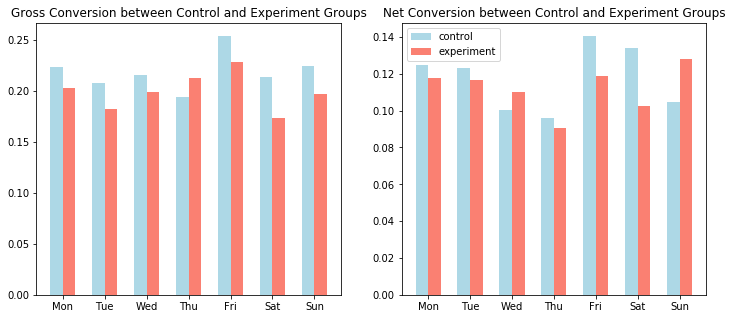

In [239]:
# visualization for GC
x=np.arange(7)
plt.figure(figsize=(12,5))


plt.subplot(121)
cont1= week_data['GC_cont']
exp1=week_data['GC_exp'] 

bar_width=0.3
tick_label=week_data.index

plt.bar(x,cont1,bar_width,color='lightblue',label='control')
plt.bar(x+bar_width,exp1,bar_width,color='salmon',label='experiment')
plt.xticks(x+bar_width/2,tick_label)
plt.title('Gross Conversion between Control and Experiment Groups')


plt.subplot(122)
cont2= week_data['NC_cont'] 
exp2=week_data['NC_exp'] 

bar_width=0.3
tick_label=week_data.index

plt.bar(x,cont2,bar_width,color='lightblue',label='control')
plt.bar(x+bar_width,exp2,bar_width,color='salmon',label='experiment')
plt.xticks(x+bar_width/2,tick_label)
plt.title('Net Conversion between Control and Experiment Groups')
plt.legend()

plt.show()

From charts above, we can see this experiment are less effective for gross conversion on Thursday, with regards to the net conversion, Wednesday and Sunday are not effective. We can also see this experiment for net conversion are more fluctuated in a week.

## Results Interpretation & Recommendations

1. Gross conversion: the observed gross conversion in the experiment group is around 2.06% less than the gross conversion observed in the control group. Also, we see that values in the confidence interval are congruent with a negative effect. Since these values are less than the dmin (the smallest impact size considered to be business-related), the impact seems to be statiscally and practically significant. What is more, the impact of this test is much larger on Sundays while there is nearly no impact on Thursdays.

2. Net conversion: Although we cannot reject the null hypothesis for this test, we see that the observed net conversion in the experiment group is around 0.49% less than the net conversion observed in the control group. Therefore, for this test, the impact is not significant neither in stastics or business issue. 

Based on these results, we can assume that this change may indeed help to set clearer expectations for students upfront. However, the results show that only gross conversion is practically and statiscally significant, not both gross and net converison. So we can further assume that this experiment is effective for decreasing the free trial enrollment, but payments cannot be converted. Therefore, my recommend is not to launch, instead, we should do some further experiments.

# Follow-Up Experiment: How to Reduce Early Cancellations

Given that Udacity want to reduce early cancellation (early cancellation is the cancellation before the end of the 14-day free trial period that triggered the payment), we can consider from two ascpects: before the free trial enrollment and after the enrollment.

1. Before the free trial enrollment, our goal is to let users with more purchasing potential enroll meanwhile guide other users to access free course materials, which may attract more potential users in the long term. Therefore, based on the experiment we've done, this time we can improve the form regarding the time commitment. Firstly, this form is only used to filter students who cannot devote enough time, however, it does not contain prerequisites for the course. Some students may spend a fairly long time on this course but they are still frustrated due to lack of prerequisite knowledge. Therefore, we should also notice students the prerequisites for the course on the form. Secondly, we also need to convert non-purchasing potential student to obtain the free course materials. So if some students do not meet the commitment and prerequisites, the form should have a button that allows students to directly convert to access free course materials.  
   Therefore, we could launch this experiment again, but add the click through probability for the free course material as variant metric. (free course material click through probability: number of unique cookies to click the "free course material" button divided by number of unique cookies to view the course overview page).  
   A successful experiment would be a significant decrease in the total conversion and a significant increase in the net conversion rate and the free course materials click through probability.  
    
    
2. For the users who have already enrolled, it is necessary to improve their user experience and make them more satisfied, so that they are willing to stay. Due to the limited coaching resources, I think the interaction between students can be increased. An effective method might be to have students led by a tutor form a group. Students can learn from and help each other, and it may also have a potential sense of competition. In this way, the group can make students more motivated and have a sense of belonging, which may lead to retention.  

     - The experiment design:
       For the students who have enrolled, randomly assgin them to experiment group and control group. In the experiment group, students will be assigned to the groups according to their mentors. And in the control group, students will not be assigned.
         
     - Unit of Diversion: the unit of diversion will be user-ids, because this experiment will occur after students enrolling the free trial where they should create accounts or sign in.
     
     - Hypothesis:
       Null Hypotheis: Setting groups will not increase significantly the number of students who will continue their course after 14 days free trial.
       Alternative Hypothesis: Setting groups will increase significantly the number of students who will continue their course after 14 days free trial.
       
     - Invariant Metrics: the invariant metric should be the number of user-ids as it is the data that we can collect before the change and it is dependent on the unit of diversion for this experiment.
     
     - Evaluation Metrics: the evaluation metric will be rentention. Retention is the number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by number of user-ids to complete checkout. 
     
   If a statistically and practically significant positive change in retention is observed, given the sanity check is passed, assuming the resources and cost is acceptable for Udacity, then we can launch this experiment.
     

Credits to the reference: https://github.com/baumanab/udacity_ABTesting#summary  
https://www.kaggle.com/mariusmesserschmied/udacity-a-b-testing-final-course-project/comments
   
   